<a href="https://colab.research.google.com/github/dayoung-lab/dayoung/blob/main/Q_learning%5Bcontinuous%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://sungbeomchoi.github.io/book_review/2021-03-12-ch10_Reinforcement_Learning

In [2]:
import gym

In [3]:
env = gym.make('MountainCarContinuous-v0')

print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high, '\\n')
print(env.action_space, '\\n')
print(env._max_episode_steps)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
[-1.2  -0.07]
[0.6  0.07] \n
Box(-1.0, 1.0, (1,), float32) \n
999


/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
env.reset()
score = 0
step = 0
for i in range(200):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)

  previous_obs = obs
  score += reward
  step += 1

  if done:
    break

print(score, step)

-6.4920774638265755 200


In [5]:
env.reset()
score = 0
step = 0

while True:
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)

  previous_obs = obs
  score += reward
  step += 1
  if done:
    break

print(score, step)

-32.30738765271739 999


In [10]:
import numpy as np

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
-199.8324
[-172, -190, -180, -168, -174, -178, -160, -188, -184, -172, -170, -166, -180, -168, -182, -182, -176, -166, -180, -188, -184, -186, -188, -180, -192, -174, -172, -186, -182, -180, -182, -192, -186, -190, -178, -184, -162, -192, -176, -174]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


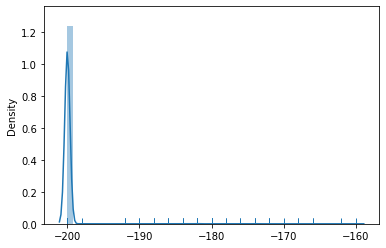

In [11]:
scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(5000):
  if i % 100 == 0:
    print(i)
  env.reset()
  score = 0
  game_memory = []
  previous_obs = []
  
  for i in range(200):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    if len(previous_obs) > 0:
      game_memory.append([previous_obs, action])

    previous_obs = obs
    if obs[0] > -0.2:
      reward = 1
    else:
      reward = -1

    score += reward

    if done:
      break

  scores.append(score)
  if score > required_score:
    accepted_scores.append(score)
    for data in game_memory:
      training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

In [18]:
import tensorflow as tf  
import gym  
import random  
import numpy as np
import keras

In [19]:
model = tf.keras.Sequential([
              tf.keras.layers.Dense(128, input_shape=(2,), activation='elu'),
              tf.keras.layers.Dense(32, activation='elu'),
              tf.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

In [21]:
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)

In [22]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
187/187 [==============================] - 1s 4ms/step - loss: 0.3418 - val_loss: 0.3397
Epoch 2/10
187/187 [==============================] - 0s 2ms/step - loss: 0.3390 - val_loss: 0.3457
Epoch 3/10
187/187 [==============================] - 0s 3ms/step - loss: 0.3388 - val_loss: 0.3349
Epoch 4/10
187/187 [==============================] - 0s 3ms/step - loss: 0.3363 - val_loss: 0.3421
Epoch 5/10
187/187 [==============================] - 0s 3ms/step - loss: 0.3378 - val_loss: 0.3353
Epoch 6/10
187/187 [==============================] - 0s 3ms/step - loss: 0.3369 - val_loss: 0.3349
Epoch 7/10
187/187 [==============================] - 0s 2ms/step - loss: 0.3358 - val_loss: 0.3373
Epoch 8/10
187/187 [==============================] - 0s 3ms/step - loss: 0.3370 - val_loss: 0.3346
Epoch 9/10
187/187 [==============================] - 0s 3ms/step - loss: 0.3370 - val_loss: 0.3344
Epoch 10/10
187/187 [==============================] - 0s 3ms/step - loss: 0.3364 - val_loss: 0.3353

In [24]:
scores = []
steps = []
actions = []

for i in range(500):
  if i % 100 == 99:
    print(i, 'mean score: {}, mean step: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:])))

    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
      if len(previous_obs) == 0:
        action = env.action_space.sample()
      else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
        actions.append(action)

      obs, reward, done, info = env.step(action)
      previous_obs = obs
      score += reward
      step += 1

      if done:
        break

    scores.append(score)
    steps.append(step)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


99 mean score: nan, mean step: nan
1/1 [==============================] - 0s 17ms/step
199 mean score: 99.26061453449158, mean step: 562.0
1/1 [==============================] - 0s 21ms/step
299 mean score: 49.2645675404567, mean step: 780.5
1/1 [==============================] - 0s 20ms/step
399 mean score: 32.71358391350842, mean step: 853.3333333333334
1/1 [==============================] - 0s 33ms/step
499 mean score: 49.29510167558935, mean step: 839.0
1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

39.383050077548944


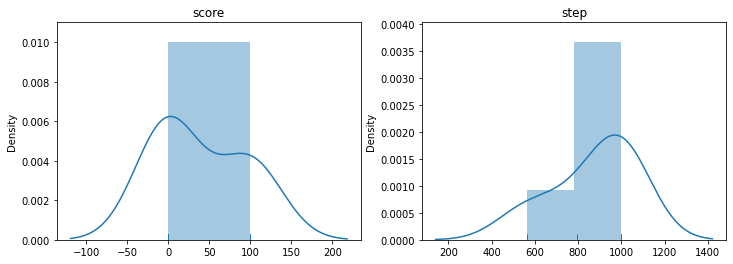

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


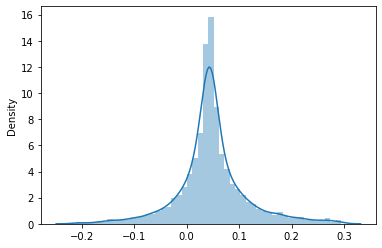

In [27]:
sns.distplot(actions)
